In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
veri = pd.read_csv("musteriler.csv")
veri

,No,Cinsiyet,Yas,Hacim,Maas
0,1,K,60,69900,6325
1,2,K,30,79000,5200
2,3,E,52,85500,7825
3,4,E,57,17100,8375
4,5,E,55,5500,5450
...,...,...,...,...,...
195,196,E,22,96600,7900
196,197,E,39,83700,7675
197,198,K,25,34000,4000
198,199,K,30,42000,5500


In [3]:
X = veri.iloc[:,3:].values # Hacim ve maaş sütunlarını alalım
X

array([[ 69900,   6325],
       [ 79000,   5200],
       [ 85500,   7825],
       [ 17100,   8375],
       [  5500,   5450],
       [ 27200,   8550],
       [ 20500,   4500],
       [ 69000,   5050],
       [ 13200,   8325],
       [ 31800,   5975],
       [ 59200,   5700],
       [ 95800,   6475],
       [ 46200,   3850],
       [ 29800,   4100],
       [ 83000,   8125],
       [143500,   8650],
       [ 91300,   5125],
       [  9800,   3950],
       [ 79500,   5325],
       [ 66400,   5775],
       [ 25900,   3400],
       [     0,   7075],
       [ 90900,   5725],
       [ 51800,   4300],
       [126800,   7500],
       [ 40800,   5000],
       [ 26400,   5325],
       [ 76100,   5350],
       [ 26500,   2600],
       [ 37200,   6250],
       [  4000,   3075],
       [ 34500,   4875],
       [ 47100,   5525],
       [ 95600,   7225],
       [ 35400,   5275],
       [ 41100,   6050],
       [ 46400,   3425],
       [ 10400,   4600],
       [ 50100,   4575],
       [111300,   8525],


In [4]:
# K-MEANS
from sklearn.cluster import KMeans

# 3 kümeye ayıracağız ve k-means++ kullanacağız
kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit(X)
print(kmeans.cluster_centers_) # merkez noktalarına bakalım

[[ 58911.76470588   5865.44117647]
 [ 22282.55813953   5310.75581395]
 [104386.95652174   7289.13043478]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Window

[242389902746.875, 69083288306.74913, 37362865661.97312, 19665039712.795006, 12911353632.710127, 8631933632.939522, 6759928141.384079, 5301517432.980298, 4172822197.4469495]


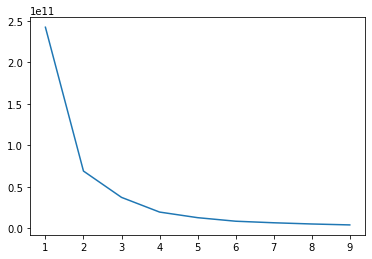

In [5]:
# Burada ise en iyi cluster sayısını bulmak için deniyoruz ve bunu grafikte gösteriyoruz
sonuclar = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=123)
    kmeans.fit(X)
    sonuclar.append(kmeans.inertia_)
print(sonuclar)    
plt.plot(range(1,10), sonuclar)
plt.show()

In [6]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=123)
Y_tahmin = kmeans.fit_predict(X)
print(Y_tahmin)

[2 2 2 1 1 1 1 2 1 3 3 2 3 1 2 0 2 1 2 2 1 1 2 3 0 3 1 2 1 3 1 3 3 2 3 3 3
 1 3 0 0 1 2 1 1 3 3 3 3 0 1 2 0 0 2 2 1 2 3 2 0 2 3 1 3 1 3 2 3 1 2 2 2 2
 1 1 0 2 3 1 1 1 3 3 0 2 2 3 1 1 2 1 0 3 1 3 1 2 1 1 3 0 2 1 1 2 2 3 3 0 0
 2 2 2 2 3 1 2 3 3 1 3 2 2 2 3 1 1 0 1 1 3 3 3 3 1 3 3 2 3 2 1 3 3 2 3 3 3
 3 1 3 3 2 1 3 0 1 3 0 1 3 3 3 3 1 3 3 2 1 1 2 1 1 3 2 1 1 3 0 3 3 2 3 0 2
 0 1 1 3 1 3 1 3 2 1 2 2 3 3 3]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


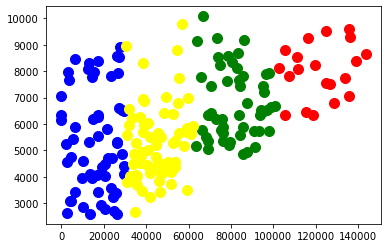

In [7]:
plt.scatter(X[Y_tahmin==0,0], X[Y_tahmin==0,1], s=100, c='red')
plt.scatter(X[Y_tahmin==1,0], X[Y_tahmin==1,1], s=100, c='blue')
plt.scatter(X[Y_tahmin==2,0], X[Y_tahmin==2,1], s=100, c='green')
plt.scatter(X[Y_tahmin==3,0], X[Y_tahmin==3,1], s=100, c='yellow')
plt.show()

In [8]:
# HİYERARŞİK BÖLÜTLEME
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
Y_tahmin = ac.fit_predict(X)
print(Y_tahmin)

[0 0 0 2 2 2 2 0 2 1 1 0 1 2 0 0 0 2 0 0 2 2 0 1 0 1 2 0 2 1 2 1 1 0 1 1 1
 2 1 0 0 2 0 2 2 1 1 1 1 0 2 0 0 0 0 0 2 0 1 0 0 0 1 2 1 2 1 0 1 2 0 0 0 0
 2 2 0 0 1 2 2 2 1 1 0 0 0 1 2 2 0 2 0 1 2 1 2 0 2 2 1 0 0 2 2 0 0 1 1 0 0
 0 0 0 0 1 2 0 1 1 2 1 0 0 0 1 2 2 0 2 2 1 1 1 1 2 1 1 0 1 0 2 1 1 0 1 1 1
 1 2 1 1 0 2 1 0 2 1 0 2 1 1 2 1 2 1 1 0 2 2 0 2 2 1 1 2 2 1 0 1 1 0 1 0 0
 0 2 2 1 2 1 2 1 0 2 0 0 1 1 1]


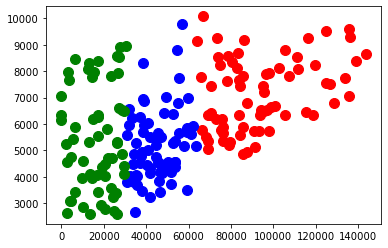

In [9]:
plt.scatter(X[Y_tahmin==0,0], X[Y_tahmin==0,1], s=100, c='red')
plt.scatter(X[Y_tahmin==1,0], X[Y_tahmin==1,1], s=100, c='blue')
plt.scatter(X[Y_tahmin==2,0], X[Y_tahmin==2,1], s=100, c='green')
plt.show()

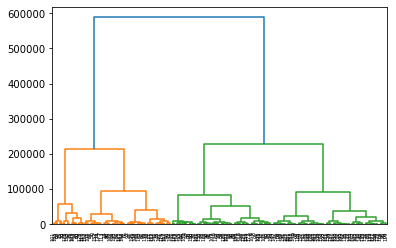

In [10]:
import scipy.cluster.hierarchy as sch

dendogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.show()